In [1]:
!pip install ultralytics

In [52]:
## importing required libraries
import os
import cv2
import random

from PIL import Image, ImageFile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import shutil

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

%matplotlib inline

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.221 🚀 Python-3.11.5 torch-2.1.1+cu121 CUDA:0 (Tesla T4, 15948MiB)
Setup complete ✅ (8 CPUs, 54.9 GB RAM, 64.7/3968.6 GB disk)


In [63]:
def plot_one_box(x, image, color=None, label=None, line_thickness=None):
    # Plots one bounding box on image img
    tl = line_thickness or round(
        0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, label, (c1[0], c1[1] - 2), 0, tl / 3,
                    [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)

def draw_box_on_image(image_name, classes, colors, LABEL_FOLDER, RAW_IMAGE_FOLDER, OUTPUT_IMAGE_FOLDER):
    """
    This function will add rectangle boxes on the images.
    """
    txt_path = os.path.join(LABEL_FOLDER, '%s.txt' %
                            (image_name))  # 本次检测结果txt路径
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = os.path.join(RAW_IMAGE_FOLDER, '%s.png' %  ##CPD
                              (image_name))  # 本次原始图片jpg路径

    save_file_path = os.path.join(
        OUTPUT_IMAGE_FOLDER, '%s.jpg' % (image_name))  # 本次保存图片jpg路径

    # flag_people_or_car_data = 0  #变量 代表类别
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0

    box_number = 0
    for line in source_file:  # 例遍 txt文件得每一行
        staff = line.split()  # 对每行内容 通过以空格为分隔符对字符串进行切片
        class_idx = int(staff[0])

        x_center, y_center, w, h = float(
            staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)

        plot_one_box([x1, y1, x2, y2], image, color=colors[class_idx],
                     label=classes[class_idx], line_thickness=None)

        cv2.imwrite(save_file_path, image)

        box_number += 1
    return box_number


def make_name_list(RAW_IMAGE_FOLDER, IMAGE_NAME_LIST_PATH):
    """
    This function will collect the image names without extension and save them in the name_list.txt. 
    """
    image_file_list = os.listdir(RAW_IMAGE_FOLDER)  # 得到该路径下所有文件名称带后缀

    text_image_name_list_file = open(
        IMAGE_NAME_LIST_PATH, 'w')  # 以写入的方式打开txt ，方便更新 不要用追加写

    for image_file_name in image_file_list:  # 例遍写入
        image_name, file_extend = os.path.splitext(image_file_name)  # 去掉扩展名
        text_image_name_list_file.write(image_name+'\n')  # 写入

    text_image_name_list_file.close()


In [10]:

images_path='/home/azureuser/Alpine-Aster/data/raw/bildacher/images'
annotations_path='/home/azureuser/Alpine-Aster/data/raw/bildacher/yolo'
L=os.listdir(images_path)
A=os.listdir(annotations_path)
print (L[0], A[0])

DJI_20210901144329_0195_02_02.png DJI_20210901144306_0177_02_02.txt


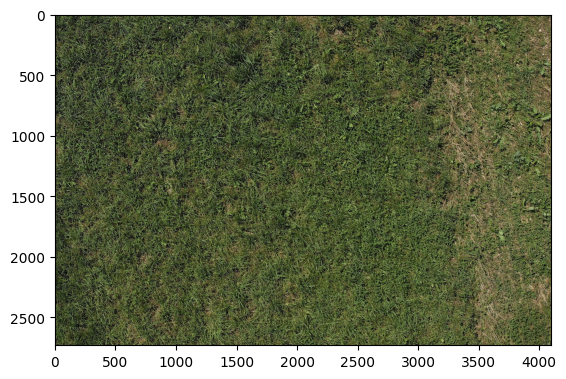

/home/azureuser/Alpine-Aster/data/raw/bildacher/yolo/DJI_20210901144329_0195_02_02.txt
['0 0.971206 0.3290805 0.0577001 0.1007692', '0 0.9878283 0.1634615 0.0237963 0.0439194', '0 0.9640637 0.4564029 0.0417553 0.0766227']


In [39]:
def verify_annotations(image_path):
    my_path='/'.join(image_path.split('/')[0:-2])
    
    image_file=image_path.split('/')
    image_file=image_file[len(image_file)-1]
    
    annotation_file=image_file.split('.')[0] + '.txt'
    annotation_path=my_path+'/yolo/'+annotation_file    

    #image = Image.open(img_path)
    img = mpimg.imread(image_path)
    imgplot = plt.imshow(img)
    plt.show()
    
    with open(annotation_path) as file:
        print(annotation_path)
        annotations = [line.rstrip() for line in file]
        
    print(annotations)
    
    
myimage_path='/home/azureuser/Alpine-Aster/data/raw/bildacher/images/' + L[0]
verify_annotations(myimage_path)

In [70]:
file_to_copy = '/home/azureuser/Alpine-Aster/data/raw/bildacher/yolo/DJI_20210901144329_0195_02_02.txt'

# Specify the path of the destination directory you want to copy to
destination_directory = '/home/azureuser/Alpine-Aster/data/raw/bildacher/yolo_cpd_test'

# Use the shutil.copy() method to copy the file to the destination directory
shutil.copy(file_to_copy, destination_directory)

'/home/azureuser/Alpine-Aster/data/raw/bildacher/yolo_cpd_test/DJI_20210901144329_0195_02_02.txt'

In [ ]:
def draw_bounding_boxes():
    

In [72]:
# Config the global variables 
LABEL_FOLDER = '/home/azureuser/Alpine-Aster/data/raw/bildacher/yolo' #  yolo Put the label files in this folder labels
RAW_IMAGE_FOLDER = '/home/azureuser/Alpine-Aster/data/raw/bildacher/images' # images  Put the original images without boxes in this folder. raw_images路径
OUTPUT_IMAGE_FOLDER = '/home/azureuser/Alpine-Aster/data/raw/bildacher/images_with_bb_verify/'  # './save_image/'  The output images would be saved to this folder. 保存图片文件夹save_image路径
IMAGE_NAME_LIST_PATH = '/home/azureuser/Alpine-Aster/data/raw/bildacher/images_with_bb_verify/name_list_cpd_test.txt'  # The file name of images will be saved into this text file. 
CLASS_PATH = '/home/azureuser/Alpine-Aster/data/raw/bildacher/classes_cpd_test.txt' # Put the class names in this text file.

make_name_list(RAW_IMAGE_FOLDER, IMAGE_NAME_LIST_PATH) 

classes = image_names = open(CLASS_PATH).read().strip().split('\n')
random.seed(42)
colors = [[random.randint(0, 255) for _ in range(3)]
              for _ in range(len(classes))]

image_names = open(IMAGE_NAME_LIST_PATH).read().strip().split()  

box_total = 0
image_total = 0
for image_name in image_names:  
    box_num = draw_box_on_image(
            image_name, classes, colors, LABEL_FOLDER, RAW_IMAGE_FOLDER, OUTPUT_IMAGE_FOLDER) 
    box_total += box_num
    image_total += 1
    print('Box number:', box_total, 'Image number:', image_total)

DJI_20210901144329_0195_02_02
Box number: 3 Image number: 1
DJI_20210901143300_0698_01_01
Box number: 5 Image number: 2
DJI_20210901143828_0957_01_01
Box number: 6 Image number: 3
DJI_20210901143757_0933_02_02
Box number: 13 Image number: 4
DJI_20210901144052_0072_02_02
Box number: 16 Image number: 5
DJI_20210901143801_0936_01_01
Box number: 18 Image number: 6
DJI_20210901144029_0054_02_01
Box number: 21 Image number: 7
DJI_20210901144247_0162_01_01
Box number: 30 Image number: 8
DJI_20210901143754_0930_01_02
Box number: 35 Image number: 9
DJI_20210901144317_0186_02_01
Box number: 45 Image number: 10
DJI_20210901143315_0710_01_02
Box number: 46 Image number: 11
DJI_20210901144014_0042_01_02
Box number: 49 Image number: 12
DJI_20210901144104_0081_02_01
Box number: 51 Image number: 13
DJI_20210901143554_0836_02_02
Box number: 53 Image number: 14
DJI_20210901143550_0833_01_02
Box number: 54 Image number: 15
DJI_20210901143233_0677_02_02
Box number: 55 Image number: 16
DJI_20210901143311_0

In [87]:
# Config the global variables 
LABEL_FOLDER = '/home/azureuser/Alpine-Aster/data/postprocessed2/train/labels' #  yolo Put the label files in this folder labels
RAW_IMAGE_FOLDER = '/home/azureuser/Alpine-Aster/data/postprocessed2/train/images' # images  Put the original images without boxes in this folder. raw_images路径
OUTPUT_IMAGE_FOLDER = '/home/azureuser/Alpine-Aster/data/postprocessed2/train/images_verify_bb/'  # './save_image/'  The output images would be saved to this folder. 保存图片文件夹save_image路径
IMAGE_NAME_LIST_PATH = '/home/azureuser/Alpine-Aster/data/postprocessed2/train/images_verify_bb/name_list_cpd_test.txt'  # The file name of images will be saved into this text file. 
CLASS_PATH = '/home/azureuser/Alpine-Aster/data/raw/bildacher/classes_cpd_test.txt' # Put the class names in this text file.

make_name_list(RAW_IMAGE_FOLDER, IMAGE_NAME_LIST_PATH) 

classes = image_names = open(CLASS_PATH).read().strip().split('\n')
random.seed(42)
colors = [[random.randint(0, 255) for _ in range(3)]
              for _ in range(len(classes))]

image_names = open(IMAGE_NAME_LIST_PATH).read().strip().split()  

box_total = 0
image_total = 0
for image_name in image_names:  
    box_num = draw_box_on_image(
            image_name, classes, colors, LABEL_FOLDER, RAW_IMAGE_FOLDER, OUTPUT_IMAGE_FOLDER) 
    box_total += box_num
    image_total += 1
    print('Box number:', box_total, 'Image number:', image_total)

20230615_SchildDotnachtZaelgli_S_20_F_60_H_12_O_krma_ID1_DJI_20230615145138_0160.0_0
Box number: 1 Image number: 1
20230425_SchneiderWallenwil_S_20_F_50_O_sama_ID1_DJI_20230425153327_0198.1_1
Box number: 2 Image number: 2
20230615_SchildDotnachtZaelgli_S_20_F_60_H_12_O_krma_ID1_DJI_20230615145414_0231.2_2
Box number: 3 Image number: 3
20230620_HerrenpuentSuedwestTestfield_S_25_F_70_H_12_O_sama_ID5_DJI_20230620173253_0071.0_2
Box number: 4 Image number: 4
20230425_SchneiderWallenwil_S_20_F_50_O_sama_ID2_DJI_20230425155357_0037.2_0
Box number: 5 Image number: 5
20230615_SchildDotnachtZaelgli_S_20_F_60_H_12_O_krma_ID1_DJI_20230615145905_0362.2_3
Box number: 6 Image number: 6
20230614_SchneiderWallenwilZisterwis_S_20_F_60_H_12_O_sama_ID1_DJI_20230614153909_0328.0_3
Box number: 7 Image number: 7
20230609_HerrenpuentSuedost_S_20_F_60_H_12_O_krma_ID1_DJI_20230609145502_0083.2_1
Box number: 8 Image number: 8
20230609_RuedimoosTaenikon_S_20_F_60_H_12_O_krma_ID1_DJI_20230609113024_0634.1_0
Box n

In [11]:
print (L[0])
print (A[0])

DJI_20210901144329_0195_02_02.png
DJI_20210901144306_0177_02_02.txt


In [5]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
# results = model.train(data='coco128.yaml', epochs=100, imgsz=640)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [76]:
# Image
img_path = '/home/azureuser/Alpine-Aster/data/raw/bildacher/images/DJI_20210901141930_0062_01_02.png'
image = Image.open(img_path)
image.size

(4096, 2730)

In [77]:
#mydata='/home/azureuser/Alpine-Aster/notebook/prepare_data/yolo_data.yaml'
mydata='/home/azureuser/Alpine-Aster/notebook/prepare_data/yolo_data.yaml'

# Train the model using the 'coco128.yaml' dataset for 3 epochs
results = model.train(data=mydata, epochs=100, rect = True)

Ultralytics YOLOv8.0.221 🚀 Python-3.11.5 torch-2.1.1+cu121 CUDA:0 (Tesla T4, 15948MiB)


engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/home/azureuser/Alpine-Aster/notebook/prepare_data/yolo_data.yaml, epochs=100, patience=50, batch=16, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train32333, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=

train: Scanning /home/azureuser/Alpine-Aster/data/raw/bildacher/labels.cache... 0 images, 208 backgrounds, 0 corrupt: 100%|██████████| 208/208 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /home/azureuser/Alpine-Aster/data/raw/bildacher/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False



val: Scanning /home/azureuser/Alpine-Aster/data/raw/bildacher/labels.cache... 0 images, 208 backgrounds, 0 corrupt: 100%|██████████| 208/208 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /home/azureuser/Alpine-Aster/data/raw/bildacher/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.


Plotting labels to runs/detect/train32333/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to runs/detect/train32333
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.63G          0      216.4          0          0       1280: 100%|██████████| 13/13 [00:48<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.98s/it]

                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.69G          0      197.7          0          0       1280: 100%|██████████| 13/13 [01:27<00:00,  6.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:07<00:00,  9.71s/it]

                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.69G          0      181.8          0          0       1280: 100%|██████████| 13/13 [01:52<00:00,  8.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:45<00:00, 15.12s/it]

                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       5.6G          0      166.9          0          0       1280: 100%|██████████| 13/13 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.46s/it]

                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       5.6G          0      154.7          0          0       1280: 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.56s/it]

                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       5.6G          0      141.4          0          0       1280: 100%|██████████| 13/13 [00:07<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.57s/it]

                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       5.6G          0      127.9          0          0       1280: 100%|██████████| 13/13 [00:14<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.57s/it]

                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       5.6G          0      116.7          0          0       1280: 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.62s/it]

                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       5.6G          0        107          0          0       1280: 100%|██████████| 13/13 [00:09<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.62s/it]

                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       5.6G          0      98.35          0          0       1280: 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]

                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       5.6G          0      87.61          0          0       1280: 100%|██████████| 13/13 [00:09<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]


                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       5.6G          0         78          0          0       1280: 100%|██████████| 13/13 [00:19<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]


                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       5.6G          0      69.16          0          0       1280: 100%|██████████| 13/13 [00:17<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]


                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       5.6G          0      61.33          0          0       1280: 100%|██████████| 13/13 [00:13<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]

                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       5.6G          0      54.14          0          0       1280: 100%|██████████| 13/13 [00:22<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]


                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       5.6G          0      47.76          0          0       1280: 100%|██████████| 13/13 [00:14<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]


                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       5.6G          0      41.65          0          0       1280: 100%|██████████| 13/13 [00:17<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.58it/s]


                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       5.6G          0      36.49          0          0       1280: 100%|██████████| 13/13 [00:19<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]


                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       5.6G          0       31.9          0          0       1280: 100%|██████████| 13/13 [00:13<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]


                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       5.6G          0      27.91          0          0       1280: 100%|██████████| 13/13 [00:21<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       5.6G          0      23.94          0          0       1280: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]


                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       5.6G          0      20.76          0          0       1280: 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.22it/s]

                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       5.6G          0      17.87          0          0       1280: 100%|██████████| 13/13 [00:21<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]

                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       5.6G          0       15.4          0          0       1280: 100%|██████████| 13/13 [00:13<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.86it/s]

                   all        208          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       5.6G          0      13.29          0          0       1280: 100%|██████████| 13/13 [00:19<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.11it/s]


IndexError: list index out of range

In [ ]:
# Evaluate the model's performance on the validation set
results = model.val()

In [88]:
mydata='/home/azureuser/Alpine-Aster/data/postprocessed2/yolo_data.yaml'

# Train the model using the 'coco128.yaml' dataset for 3 epochs
results = model.train(data=mydata, imgsz=1280,epochs=100)

# Evaluate the model's performance on the validation set
results = model.val()

Ultralytics YOLOv8.0.221 🚀 Python-3.11.5 torch-2.1.1+cu121 CUDA:0 (Tesla T4, 15948MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/home/azureuser/Alpine-Aster/data/postprocessed2/yolo_data.yaml, epochs=100, patience=50, batch=16, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train32334, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

train: Scanning /home/azureuser/Alpine-Aster/data/postprocessed2/train/labels... 176 images, 0 backgrounds, 0 corrupt: 100%|██████████| 176/176 [00:00<00:00, 291.28it/s]

train: New cache created: /home/azureuser/Alpine-Aster/data/postprocessed2/train/labels.cache
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False



val: Scanning /home/azureuser/Alpine-Aster/data/postprocessed2/val/labels... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<00:00, 272.00it/s]

val: New cache created: /home/azureuser/Alpine-Aster/data/postprocessed2/val/labels.cache


Plotting labels to runs/detect/train32334/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to runs/detect/train32334
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.2G      3.387      4.596      3.295         16       1280: 100%|██████████| 11/11 [00:05<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.86it/s]

                   all         45         45          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.84G      3.306      4.478      3.265         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         45         45    0.00164      0.222    0.00148    0.00028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.84G      3.241      4.439      3.197         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         45         45    0.00177      0.489    0.00327   0.000897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.84G      3.205      4.403      3.179         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all         45         45    0.00167      0.489    0.00361    0.00138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.84G      3.092      4.429      3.128         15       1280: 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         45         45    0.00193      0.467    0.00996    0.00232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.84G      3.192      4.323       3.13         15       1280: 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         45         45    0.00244      0.444     0.0133    0.00346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.84G      3.021      4.246      3.038         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         45         45     0.0116      0.267     0.0105    0.00393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.84G      2.918      4.311      2.981         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         45         45    0.00217        0.6     0.0182    0.00456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.84G      2.897      4.234      2.949         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         45         45      0.002      0.578     0.0101    0.00325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.84G       2.84      4.132      3.009         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         45         45    0.00191      0.556    0.00545    0.00124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.84G      2.815      4.051      2.978         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         45         45     0.0115        0.4     0.0318    0.00705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.84G      2.741      4.099      2.899         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         45         45    0.00326      0.667     0.0687     0.0123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.84G      2.772      4.055      2.911         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         45         45    0.00328      0.711       0.04     0.0106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.84G      2.691       3.98      2.886         16       1280: 100%|██████████| 11/11 [00:07<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         45         45    0.00303      0.778      0.049     0.0167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.84G      2.533       3.88      2.835         14       1280: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         45         45     0.0202        0.6     0.0531     0.0169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.84G      2.437      3.699        2.7         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         45         45     0.0862      0.267     0.0681     0.0209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.84G      2.511      3.629      2.686         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         45         45     0.0501      0.333     0.0472     0.0151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.84G       2.46      3.621      2.629         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         45         45     0.0474      0.467     0.0416     0.0147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.84G      2.461      3.597      2.691         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         45         45      0.111      0.289     0.0753     0.0219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.84G      2.379      3.512      2.536         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         45         45     0.0612      0.378     0.0713     0.0272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.84G      2.373      3.463      2.571         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         45         45     0.0558      0.289     0.0629     0.0221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.84G      2.264      3.523      2.504         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         45         45     0.0302      0.556     0.0532      0.019



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.84G      2.259      3.529      2.521         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         45         45     0.0241      0.467     0.0455     0.0194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.84G      2.278      3.398      2.498         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         45         45     0.0307      0.644     0.0964     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.84G      2.124      3.293      2.366         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         45         45     0.0697      0.533      0.133     0.0507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.84G      2.224      3.263      2.475         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]


                   all         45         45      0.156      0.289      0.109     0.0466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.84G      2.245      3.152      2.411         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


                   all         45         45      0.126        0.2      0.104     0.0349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.84G      2.121      3.091       2.34         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         45         45     0.0841     0.0889      0.059     0.0176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.84G       2.05      2.999      2.286         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         45         45      0.282      0.227      0.117      0.037



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.84G      2.126      3.074      2.344         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]

                   all         45         45      0.267      0.178      0.139     0.0607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.84G      2.005      3.042      2.266         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         45         45      0.388      0.289      0.219     0.0776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.84G      1.999      3.072      2.246         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]


                   all         45         45      0.142      0.222      0.115     0.0498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.84G      2.018      3.011      2.267         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


                   all         45         45      0.265      0.289      0.168      0.074

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.84G      1.963      3.047      2.226         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]


                   all         45         45      0.291      0.356      0.185      0.087

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.84G      1.854       2.94      2.112         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         45         45      0.264        0.2      0.214      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.84G      1.877      2.867      2.092         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


                   all         45         45      0.268      0.267      0.185     0.0569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.84G      1.828      2.881      2.045         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


                   all         45         45      0.366      0.267      0.281      0.083

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.84G      1.881      2.858      2.097         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         45         45      0.381      0.333      0.286      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.84G      1.869      2.727      2.072         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         45         45      0.403      0.222      0.209     0.0953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.84G      1.879      2.764      2.052         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         45         45      0.413      0.156      0.199     0.0922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.84G      1.863      2.728      2.079         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         45         45      0.425      0.181      0.201     0.0865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.84G      1.796      2.675      2.001         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         45         45      0.386      0.333      0.256      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.84G      1.797      2.718      2.061         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]


                   all         45         45      0.512      0.356      0.282      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.84G       1.79      2.729      2.017         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


                   all         45         45      0.493      0.324      0.313      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.84G      1.791      2.689      2.029         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         45         45      0.409      0.354      0.283      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.84G       1.77      2.598      1.965         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         45         45      0.546      0.267      0.289      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.84G      1.822      2.596      2.028         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         45         45      0.552      0.289      0.267      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.84G      1.747      2.509      1.954         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]


                   all         45         45      0.296      0.309      0.233     0.0981

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.84G      1.805      2.682       2.02         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         45         45      0.164      0.378      0.107     0.0525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.84G      1.704      2.548      1.912         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         45         45      0.292      0.357      0.185     0.0838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.84G      1.726      2.511      1.913         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         45         45      0.117      0.311     0.0926     0.0434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.84G      1.658      2.385      1.887         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         45         45     0.0964      0.311     0.0743     0.0326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.84G       1.58      2.323      1.845         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         45         45      0.257      0.311      0.143     0.0675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.84G      1.591      2.338      1.808         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         45         45      0.185      0.244      0.157     0.0816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.84G      1.684      2.377      1.863         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         45         45      0.175        0.2      0.167     0.0885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.84G      1.596      2.294      1.798         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         45         45      0.402      0.222      0.198     0.0919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.84G      1.632      2.309      1.836         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         45         45      0.185      0.311      0.137     0.0566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.84G      1.692      2.395      1.852         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         45         45      0.295      0.333      0.202     0.0972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.84G      1.602      2.321      1.773         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


                   all         45         45      0.437      0.356      0.278       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.84G       1.58      2.225      1.811         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         45         45      0.228      0.356      0.236      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.84G      1.627       2.33      1.886         14       1280: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         45         45      0.281      0.378      0.247      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.84G      1.554       2.25      1.852         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         45         45      0.495      0.356      0.311       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.84G      1.634      2.234      1.865         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         45         45      0.395      0.364      0.312      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.84G      1.542      2.161      1.783         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         45         45       0.38      0.311      0.227     0.0953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.84G      1.576      2.254      1.824         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         45         45      0.455      0.311      0.261      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.84G      1.568      2.171      1.831         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         45         45      0.446      0.311      0.255       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.84G      1.578      2.133      1.825         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         45         45      0.272        0.4      0.201     0.0908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.84G      1.494      2.082      1.721         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         45         45      0.248      0.389       0.18     0.0817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.84G      1.543      2.225      1.787         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         45         45      0.268      0.378      0.199      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.84G      1.497      2.156      1.758         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         45         45      0.264      0.378      0.201     0.0945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.84G      1.494      2.094      1.715         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         45         45      0.262      0.422      0.239     0.0971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.84G      1.464      1.996      1.712         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         45         45      0.285      0.267       0.22      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.84G      1.502      2.038       1.71         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         45         45      0.235      0.511      0.222     0.0994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.84G      1.474      2.082      1.684         14       1280: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         45         45      0.273      0.311      0.204     0.0861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.84G      1.419      2.027      1.658         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


                   all         45         45      0.361      0.377      0.244      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.84G      1.437      2.011      1.673         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         45         45       0.24      0.378      0.182     0.0905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.84G      1.467       1.99      1.701         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         45         45      0.202        0.4      0.179     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.84G      1.473      1.914      1.748         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         45         45      0.214      0.467      0.154     0.0725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.84G      1.464      2.092      1.712         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         45         45      0.178        0.4      0.119     0.0573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.84G      1.434      1.952       1.68         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         45         45      0.145      0.333      0.106     0.0489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.84G      1.498      1.992      1.728         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         45         45      0.181      0.311      0.111     0.0521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.84G      1.426      1.966      1.664         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         45         45      0.212      0.378      0.146     0.0645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.84G      1.416      1.847      1.658         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         45         45      0.206      0.378      0.134     0.0627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.84G      1.376      1.913      1.604         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         45         45      0.156      0.311      0.124     0.0593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.84G      1.373      1.853      1.622         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         45         45      0.172      0.311      0.104     0.0507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.84G      1.407      1.846      1.643         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all         45         45      0.224      0.378      0.156     0.0651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.84G      1.417      1.802      1.661         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         45         45      0.256      0.378      0.181     0.0792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.84G      1.328      1.798      1.587         15       1280: 100%|██████████| 11/11 [00:04<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         45         45      0.193      0.393      0.143      0.066



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.84G      1.356      1.856       1.62         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all         45         45      0.151      0.356      0.121     0.0551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.84G      1.294      1.834       1.55         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         45         45      0.208      0.311      0.141     0.0649


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      9.58G      1.337      1.744       1.59         16       1280: 100%|██████████| 11/11 [00:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

                   all         45         45      0.219      0.311      0.181     0.0851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.84G      1.357      1.854      1.604         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         45         45      0.197      0.288      0.166     0.0772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.84G      1.315      1.827      1.606         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         45         45       0.18      0.422      0.167     0.0853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.84G      1.335      1.811      1.603         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         45         45        0.2      0.422      0.176     0.0818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.84G      1.273      1.758      1.573         16       1280: 100%|██████████| 11/11 [00:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         45         45      0.186      0.395      0.149     0.0696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.84G      1.308      1.705      1.556         15       1280: 100%|██████████| 11/11 [00:46<00:00,  4.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         45         45      0.212      0.333      0.149     0.0639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.84G      1.287      1.694      1.551         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         45         45       0.22      0.333      0.151      0.065



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.84G      1.257      1.697      1.518         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         45         45      0.211      0.311      0.157     0.0679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.84G      1.274      1.784      1.542         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         45         45      0.206      0.422      0.144     0.0661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.84G      1.302      1.717      1.574         16       1280: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         45         45      0.195        0.4      0.126      0.059



100 epochs completed in 0.188 hours.
Optimizer stripped from runs/detect/train32334/weights/last.pt, 6.4MB
Optimizer stripped from runs/detect/train32334/weights/best.pt, 6.4MB

Validating runs/detect/train32334/weights/best.pt...
Ultralytics YOLOv8.0.221 🚀 Python-3.11.5 torch-2.1.1+cu121 CUDA:0 (Tesla T4, 15948MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]


                   all         45         45      0.494      0.356      0.311       0.14
Speed: 0.6ms preprocess, 7.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train32334
Ultralytics YOLOv8.0.221 🚀 Python-3.11.5 torch-2.1.1+cu121 CUDA:0 (Tesla T4, 15948MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/azureuser/Alpine-Aster/data/postprocessed2/val/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [02:05<00:00, 41.97s/it]


                   all         45         45      0.495      0.356      0.315      0.141
Speed: 0.8ms preprocess, 1396.0ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train323342


: 

: 